In [1]:
# Global imports
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import analysis as an

# Connectivity Analysis


In [2]:
from pathlib import Path

data_folder = Path.cwd() / '..' / 'experiment' / 'data'
data_folder = data_folder.resolve()
[x for x in sorted(data_folder.iterdir()) if x.is_dir()]

[PosixPath('/home/geissdoerfer/workspace/exp-wifi-channel/experiment/data/2018-01-11-164500'),
 PosixPath('/home/geissdoerfer/workspace/exp-wifi-channel/experiment/data/2018-01-11-180602'),
 PosixPath('/home/geissdoerfer/workspace/exp-wifi-channel/experiment/data/2018-01-11-182755'),
 PosixPath('/home/geissdoerfer/workspace/exp-wifi-channel/experiment/data/2018-01-11-225043')]

In [3]:
df_old = an.get_iperf_folder(data_folder / '2018-01-11-182755', recursive=True)
df_new = an.get_iperf_folder(data_folder / '2018-01-11-225043', recursive=True)
df = pd.concat([df_old, df_new])

# df = an.get_iperf_folder(data_folder / '2017-12-12-111553', recursive=True)
df.groupby(['kernel',  'server', 'client'])['bits_per_second'].describe()


count          mean           std  \
kernel                 server client                                      
3.18.87-031887-generic nuc10  nuc11   600.0  1.895307e+08  1.203510e+09   
                              nuc12   600.0  5.172702e+07  7.039604e+08   
                              nuc13   600.0  5.464937e+07  1.155202e+06   
                              nuc6    600.0  4.673273e+07  1.539673e+06   
                       nuc11  nuc10   599.0  1.999694e+08  4.433814e+08   
                       nuc12  nuc10   600.0  1.337700e+08  1.291830e+09   
                              nuc6    600.0  1.911062e+07  6.645667e+05   
                       nuc13  nuc10   600.0  5.479966e+07  1.565126e+06   
                              nuc11   600.0  1.934774e+08  1.488097e+09   
                              nuc6    600.0  3.661495e+07  9.151683e+05   
                       nuc6   nuc10   600.0  5.518578e+07  9.072560e+05   
                              nuc11   600.0  1.962084e+08  1.008895e+09   
                              nuc12   600.0  1.287400e+07  9.574284e+05   
                              nuc13   600.0  2.992024e+07  1.146551e+06   
4.14.5-041405-generic  nuc10  nuc12   600.0  5.421028e+06  1.337003e+06   
                              nuc13   600.0  5.583852e+07  1.092282e+06   
                              nuc6    600.0  5.173127e+07  1.124364e+06   
                       nuc12  nuc10   600.0  4.940431e+06  1.057849e+06   
                              nuc6    600.0  1.978215e+07  1.441478e+06   
                       nuc13  nuc10   600.0  5.554023e+07  1.514641e+06   
                              nuc6    600.0  3.611196e+07  1.027418e+06   
                       nuc6   nuc10   600.0  5.709528e+07  8.065073e+05   
                              nuc12   600.0  1.334880e+07  8.629022e+05   
                              nuc13   600.0  3.156508e+07  1.064644e+06   

                                             min          25%          50%  \
kernel                 server client                                         
3.18.87-031887-generic nuc10  nuc11          0.0          0.0      65536.0   
                              nuc12          0.0      65536.5     131073.0   
                              nuc13   40692000.0   54262600.0   54854550.0   
                              nuc6    42008800.0   45480275.0   46661666.0   
                       nuc11  nuc10          0.0  199883500.0  200015000.0   
                       nuc12  nuc10          0.0     131072.0     196608.0   
                              nuc6    15139200.0   18807850.0   19202150.0   
                       nuc13  nuc10   46589400.0   53870469.0   54920550.0   
                              nuc11          0.0          0.0      65535.9   
                              nuc6    27129100.0   36170150.0   36666950.0   
                       nuc6   nuc10   46130400.0   54853350.0   55377760.0   
                              nuc11          0.0      65535.5      65536.1   
                              nuc12    9306100.0   12255650.0   12976200.0   
                              nuc13   22803600.0   29227475.0   29952350.0   
4.14.5-041405-generic  nuc10  nuc12     852004.0    4521940.0    5636070.0   
                              nuc13   44495900.0   55377375.0   56095400.0   
                              nuc6    47710300.0   50995300.0   51773550.0   
                       nuc12  nuc10    2359290.0    4390920.0    4849680.0   
                              nuc6    16644200.0   19071075.0   19531650.0   
                       nuc13  nuc10   50192100.0   54656200.0   55643250.0   
                              nuc6    31189800.0   35454976.0   36180950.0   
                       nuc6   nuc10   48480800.0   56946700.0   57279250.0   
                              nuc12   10813400.0   12844250.0   13304350.0   
                              nuc13   26673200.0   30935100.0   31719400.0   

                                               75%        

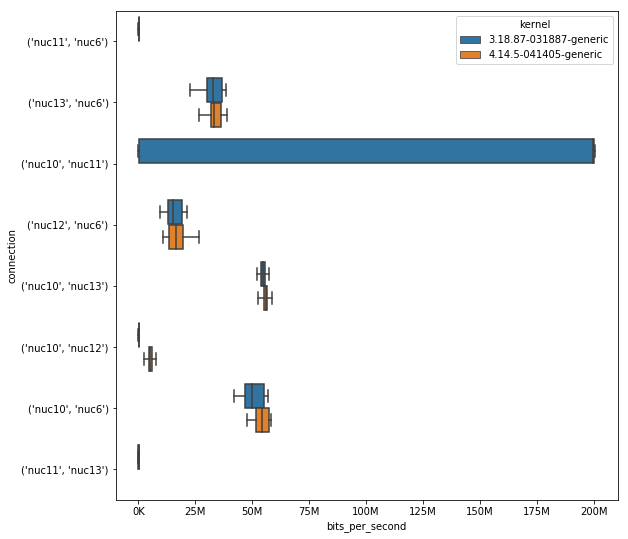

In [4]:
fig, ax = plt.subplots(figsize=(9,9))
df['connection'] = [tuple(sorted(elem)) for elem in zip(df.server, df.client)]

sns.boxplot(
    x='bits_per_second',
    y='connection',
    hue='kernel',
    data=df,
    showfliers=False,
#     split=True,
#     cut=0
);
ax.xaxis.set_major_formatter(an.bitrate_formatter)

# Map

In [6]:
from bokeh.io import push_notebook, show, output_notebook
output_notebook()


Loading BokehJS ...

In [9]:
import networkx as nx
import twistmap

G = nx.DiGraph()
G.add_nodes_from(twistmap.node_positions.keys())
means = df.groupby(['server', 'client'])['server bits per second'].mean().to_dict()
for key in means:
    G.add_edge(key[0], key[1], {'weight': means[key]})

In [10]:
plot = twistmap.create_map()
twistmap.draw_graph(plot, G)
show(plot, notebook_handle=True);